<h1>section 1 project 1</h1>

1. EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [10]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv',index_col = 'Unnamed: 0')

In [11]:
def year_trans(x):
    
    if (x>50)&(x<1900):
        return x+1900
    elif (x<50):
        return x+2000
    else:
        return x
    
def sales_trans(x):
    
    if 'K' in x:
        
        x = x.replace('K','')
        x = float(x)
        x = x * 1000
        return x
    
    elif 'M' in x:
        
        x = x.replace('M','')
        x = float(x)
        x = x * 1000000
        return x
    
    else:
        
        x = float(x)
        x = x * 1000000
        return x

print(df.isnull().sum())

df.info()

#drop nan
df.dropna(inplace=True)

df['Year'] = df['Year'].apply(year_trans).astype(int).astype(str)

print(df.isnull().sum())

df['NA_Sales'] = df['NA_Sales'].apply(sales_trans)
df['EU_Sales'] = df['EU_Sales'].apply(sales_trans)
df['JP_Sales'] = df['JP_Sales'].apply(sales_trans)
df['Other_Sales'] = df['Other_Sales'].apply(sales_trans)

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


2. 데이터 시각화
  - 지역별 장르에 따른 판매량을 분석
  - 연도별 장르에 따른 판매량을 분석
  - 출고량이 높은 게임 분석

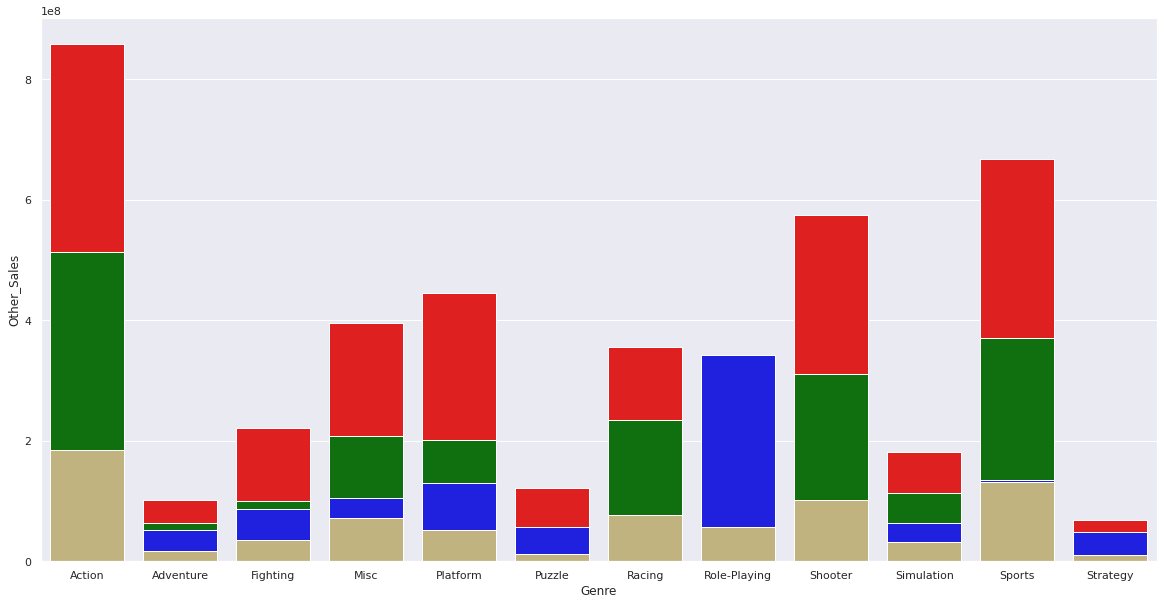

In [7]:
# draw graph (1)

genre_list = df['Genre'].unique()

N = len(genre_list)

ind = np.arange(N)

width = 0.2

a1 = df.groupby(['Genre'],as_index=False).sum()

sns.set_style('white')

sns.set(rc = {'figure.figsize':(20,10)})

s1 = sns.barplot(x='Genre', y = 'NA_Sales',data=a1, color='red')
s2 = sns.barplot(x='Genre', y = 'EU_Sales',data=a1, color='green')
s3 = sns.barplot(x='Genre', y = 'JP_Sales',data=a1, color='blue')
s4 = sns.barplot(x='Genre', y = 'Other_Sales',data=a1, color='y')

#plt.legend(labels=['NA','EU','JP','Other'],color=['r','b','y','g'])

  - 분석결과
    - 북미는 가장 높은 수요를 보여줌
    - 전체 결과에서 액션 게임의 판매량이 가장 높음
    - 일본은 다른 시장과는 다른 판매 양상을 보이므로 차별화된 판매 전략이 필요해보임
    - 어드벤처, 퍼즐, 시뮬레이션, 전략 게임 장르 등은 낮은 판매량에 기반하여 기피하는게 좋음.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


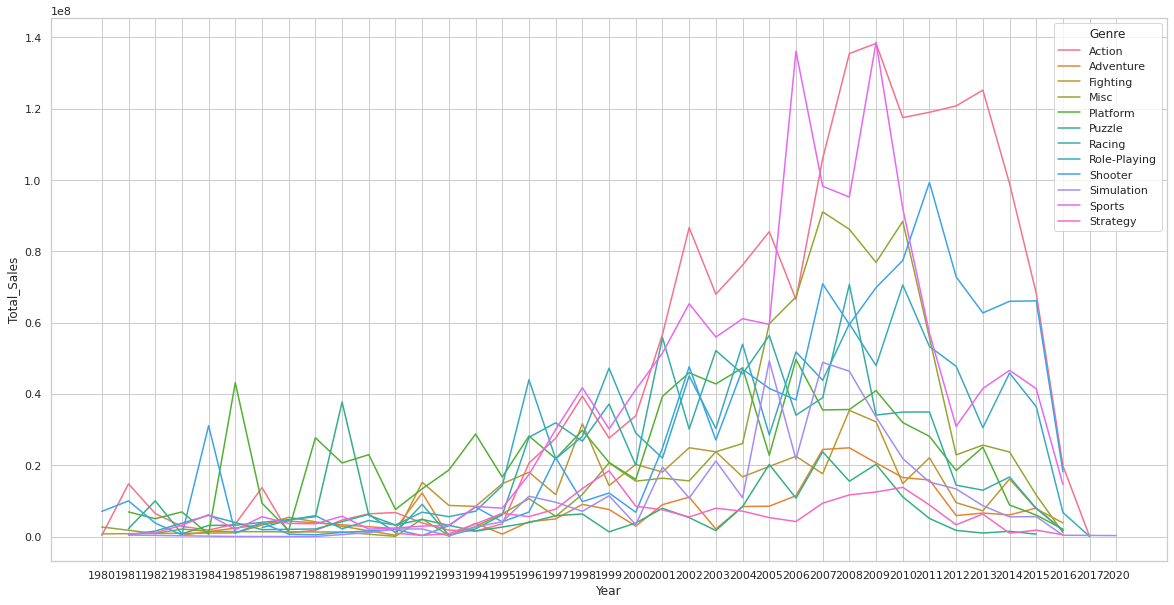

In [12]:
a2 = df.groupby(['Genre','Year'],as_index=False).sum()

a2['Total_Sales'] = a2.sum(axis=1)

sns.set_style('whitegrid')

bar1 = sns.lineplot(x='Year',y='Total_Sales',data=a2,hue='Genre')

  - 분석결과
    - 2000년대 이전까진 슈터, 플랫폼, 롤 플레잉 게임의 강세
    - 2000년대 이후 액션과 스포츠 게임이 시장을 양분함

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Nintendo                                  64
Activision                                18
Sony Computer Entertainment               16
Microsoft Game Studios                    13
Electronic Arts                           12
Take-Two Interactive                      11
Ubisoft                                    7
Bethesda Softworks                         3
Konami Digital Entertainment               3
Sega                                       2
505 Games                                  2
Capcom                                     2
Sony Computer Entertainment Europe         1
Virgin Interactive                         1
LucasArts                                  1
SquareSoft                                 1
GT Interactive                             1
Atari                                      1
Warner Bros. Interactive Entertainment     1
Name: Publisher, dtype: int64


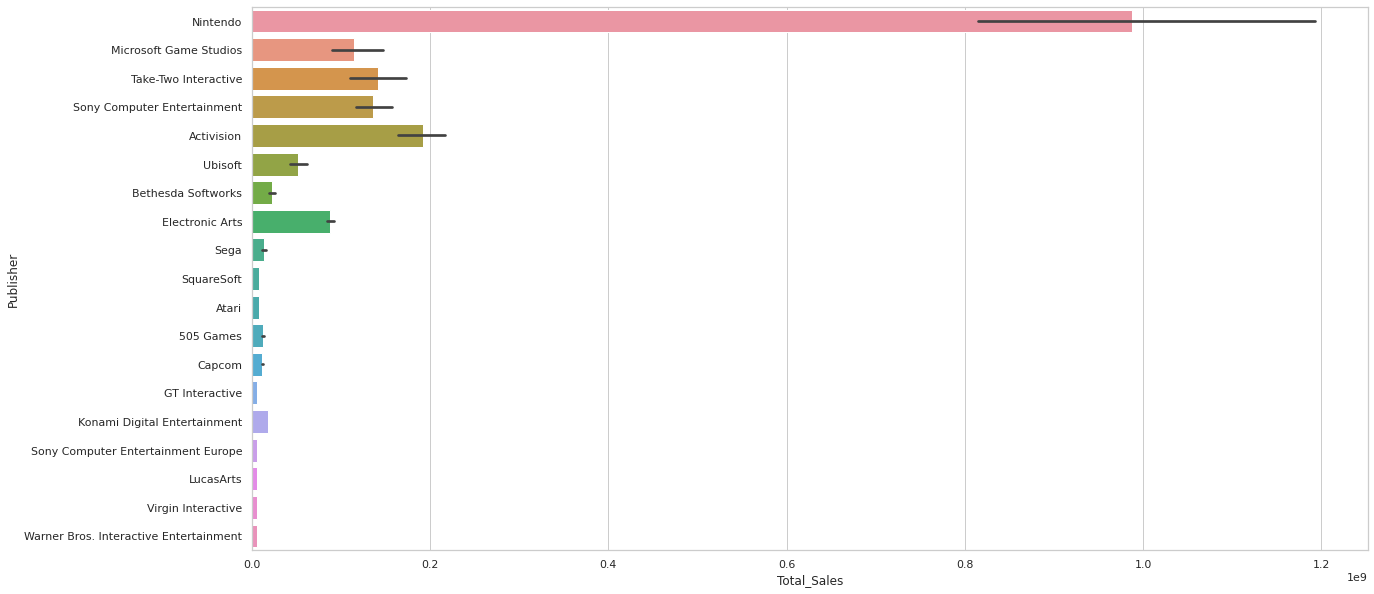

In [13]:
df['Total_Sales'] = df.sum(axis=1)


best_sales = df.sort_values(by='Total_Sales', ascending=False).head(160)

print(best_sales['Publisher'].value_counts())

sns.barplot(x='Total_Sales',y='Publisher',data=best_sales,estimator=sum)

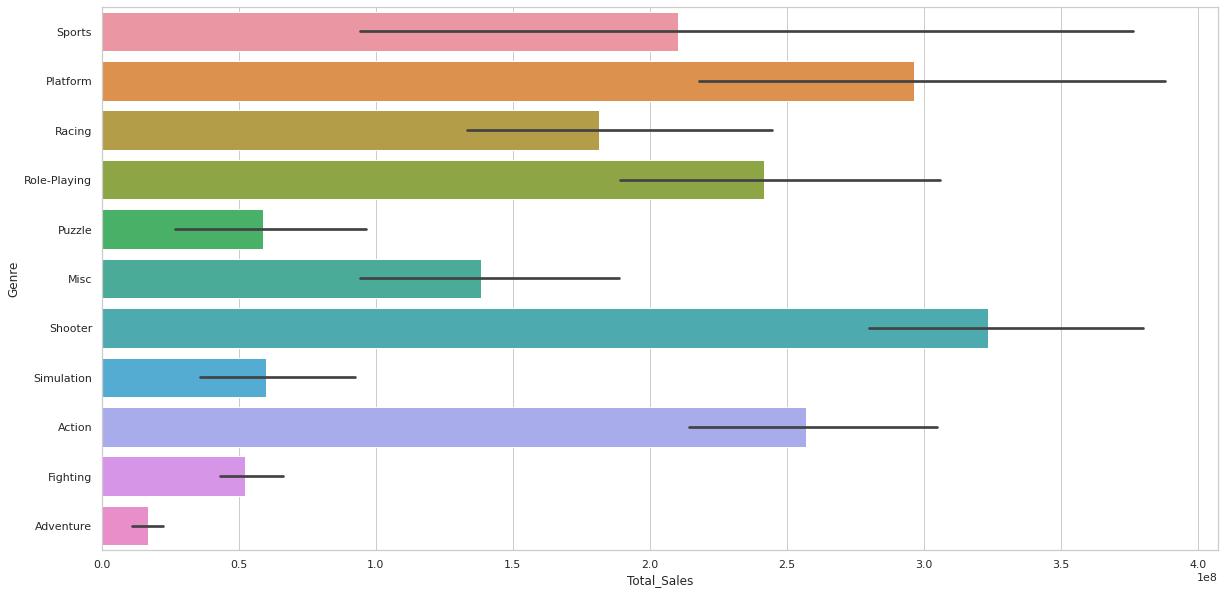

In [14]:
sns.barplot(x='Total_Sales',y='Genre',data=best_sales,estimator=sum)

In [18]:
print(best_sales['Name'].head(50))

2909                                       Wii Sports
4200                                Super Mario Bros.
12580                                  Mario Kart Wii
3353                                Wii Sports Resort
7830                         Pokemon Red/Pokemon Blue
1204                                           Tetris
6938                            New Super Mario Bros.
3015                                         Wii Play
16532                       New Super Mario Bros. Wii
10489                                       Duck Hunt
11138                                      Nintendogs
10651                                   Mario Kart DS
9417                      Pokemon Gold/Pokemon Silver
3436                                          Wii Fit
10900                                    Wii Fit Plus
4344                               Kinect Adventures!
3484                               Grand Theft Auto V
14670                   Grand Theft Auto: San Andreas
13112                       

- 출고량 상위 1% 게임 분석
  - Nintendo 유통사의 게임이 대부분을 점유. 매우 높은 판매고를 올림.
  - 장르는 편중되지 않았으며 연도별 점유율 그래프에서 낮은 점유율을 가졌던 장르는 여기서도 비중이 낮음.
  - 슈터 장르는 기대 이상의 강세를 보임.
  - 게임명 분석 결과 같은 브랜드(게임명; ex: Mario, pokemon) 게임의 경우가 많은 것으로 보아 해당 사항을 고려하여 게임 발매 고려가 우선됨.

  - 최종 분석 결과
  
  >  - 가장 높은 흥행 예상 게임은
    - 시리즈 단위로 기획 가능한
    - 액션 혹은 스포츠 장르의
    - Nintendo 사를 유통사로 협업하는
    - 북미와 유럽을 대상으로 하는 게임으로 선정되었다.
  
  이상의 분석은 연도별 변화가 심한 플랫폼과 현지 발매 사정 등을 고려하지 않았으므로 실제 발매 시 이에 따른 조정이 필요할 것으로 보인다.